#### **Exercice 1.** Marcheur ivrogne

Un ivrogne se déplace au hasard le long d’une rue, un pas à gauche ou un pas à droite de facon equiprobable. La longueur de la rue est de 40 mètres : le marcheur peut prendre: un position entre 0 et 40(inclus). Au début, le marcheur se trouve en position 25.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random

Estimons par simulation la probabilité qu’au bout de 15 pas le marcheur finisse en position inferieure ou egale à 17.

In [ ]:
N = 100
position = 25
count = 0
steps = 15

for _ in range(N):
    position += sum(random.choice([-1, 1]) for _ in range(steps))
    if position <= 17:
        count += 1

proba = count / N
print(proba)

0.2


Visualisons la loi empirique de la position du marcheur

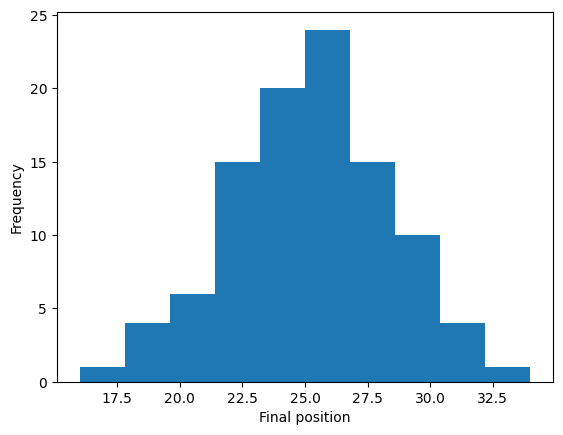

In [ ]:
def position(n, position, steps):
    return [position + sum(random.choice([-1, 1]) for _ in range(steps)) for _ in range(n)]

positions = position(100, 25, 15)
plt.hist(positions, bins=10)
plt.xlabel('Final position')
plt.ylabel('Frequency')
plt.show()

Supposons à present le marcheur se deplace jusqu'à ce qu'il arrive à des extremités de la rue : en position 0 ( sa maion) ou en position 40 (commisariat). La probabilité qu'il passe la nuit dans son lit plutot qu'au poste de police.

In [ ]:
import random 
def final_position(position = 25):
    while position != 0 and position != 40 :
        position += random.choice([-1, 1])
    return position

N = 100
proba = len([final_position(position = 25) for i in range(N) if final_position(position = 25) == 0])/N
print(proba)

0.43


Supponsons de plus qu'à cause du vent, la probabilité de faire un pas à gauche (vers la maison) est de $p_{g}=0.51$ (au lieu de 0.5). Quelles sont ses chances de passer le nuit tranquille? 

In [ ]:
def final_position(position = 25, p = 0.51):
    while position != 0 and position != 40 :
        position += random.choices([-1,1], weights=[p, 1-p])[0]
    return position

N = 100
proba = len([final_position(position = 25,p=0.51) for i in range(N) if final_position(position = 25,p=0.51) == 0])/N
print(proba)

0.56


Ecrire une fonction maison(pg) qui calcule la probabilité d’arriver à la maison en fonction de la probabilité  $p_g$, de déplacement à gauche. Visualiser graphiquement les valeurs de cette fonction pour $p_g$ variant de 0.4 à 0.6 par le pas de 0.01.

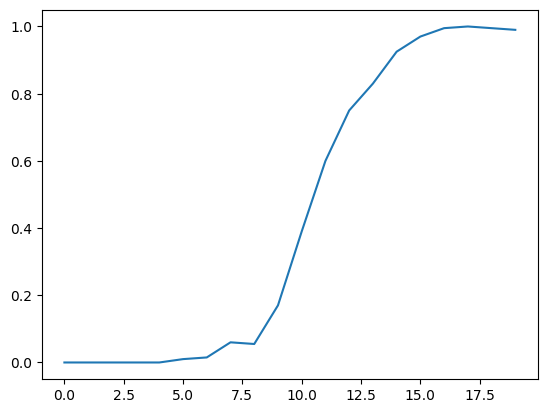

In [41]:
import random 
def maison(pg):
    num_games = 200
    end_positions = []
    for i in range(num_games):
        position = 25
        while position != 0 and position != 40 :
            position += random.choices([-1,1], weights=[pg, 1-pg])[0]
        end_positions.append(position)
    return end_positions.count(0)/num_games
data=[maison(i) for i in np.arange(0.4, 0.6, 0.01)]
plt.plot(data)
plt.show()

Calculons maintenant une liste nommée prob-maison de probabilités d'arriver à la maison pour pg
variant de 0.5 à 0.51 par le pas de 0.001. Utilisons un nombre de simulations suffisant pour obtenir
une liste de valeurs croissantes d’un rang au suivant.

Trouvons, grâce à cette liste, la plus petite valeur de p, (à 0.001 près) telle que le marcheur aie plus
de chances d’arriver à la maison qu’au commissariat.

In [57]:
prod_maison=np.array([maison(i) for i in np.arange(0.5, 0.51, 0.001)])
indice = np.min(np.where(prod_maison > 0.5)[0])
prod_maison[indice]

0.515